<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 2</h3>
<h3> Advanced EDA</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 1 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [Basic Cleaning](#part1) <br />

### Introduction <a id="intro" /> 

Importing all the required libraries.

In [132]:
import numpy as np  #importing numpy library
import pandas as pd #importing pandas library
import matplotlib.pyplot as plt #importing matplotlib library
import seaborn as sns #importing seaborn library 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

This notebook aims to conduct some basic EDA for the cleaned dataset.

Importing our data and reading through it.

In [74]:
#Reading the csv file
final_df = pd.read_csv('../Data/FinalData.csv',low_memory=False, index_col=0)
pd.set_option('display.max_columns', None)
final_df

,CRIME_TYPE,EVENT_UNIQUE_ID,REPORT_DATE_FIXED,OCC_DATE_FIXED,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,PRIMARY_OFFENCE,STATUS,HOMICIDE_TYPE,DEATH,INJURIES
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Assualt,GO-20141262074,2014-01-01,1998-06-01,2014.0,January,1.0,1.0,Wednesday,12.0,NaN,NaN,NaN,NaN,NaN,12.0,D32,"Apartment (Rooming House, Condo)",Apartment,1480.0,110.0,Administering Noxious Thing,Assault,38,Lansing-Westgate,-79.425896,43.757346,NotApplicable,NotApplicable,NotApplicable,0,0
2,Assualt,GO-20141260889,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,D51,"Apartment (Rooming House, Condo)",Apartment,1430.0,100.0,Assault,Assault,74,North St.James Town,-79.376497,43.666423,NotApplicable,NotApplicable,NotApplicable,0,0
3,Assualt,GO-20141261050,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,D54,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,69,Blake-Jones,-79.344839,43.678946,NotApplicable,NotApplicable,NotApplicable,0,0
4,Assualt,GO-20141259344,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,2.0,2014.0,January,1.0,1.0,Wednesday,2.0,D52,Bar / Restaurant,Commercial,1420.0,110.0,Assault Bodily Harm,Assault,164,Wellington Place,-79.391841,43.646639,NotApplicable,NotApplicable,NotApplicable,0,0
5,Assualt,GO-20141260537,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,NSA,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62523,Break and Enter,GO-20222563482,2022-12-31,2022-12-29,2022.0,December,31.0,365.0,Saturday,21.0,2022.0,December,29.0,363.0,Thursday,15.0,D33,"Apartment (Rooming House, Condo)",Apartment,2120.0,210.0,Unlawfully In Dwelling-House,Break and Enter,150,Fenside-Parkwoods,-79.320955,43.760970,NotApplicable,NotApplicable,NotApplicable,0,0
62524,Break and Enter,GO-20222557270,2022-12-31,2022-12-31,2022.0,December,31.0,365.0,Saturday,0.0,2022.0,December,31.0,365.0,Saturday,0.0,D51,Other Commercial / Corporate Places (For Profi...,Commercial,2120.0,220.0,B&E W'Intent,Break and Enter,70,South Riverdale,-79.346659,43.639056,NotApplicable,NotApplicable,NotApplicable,0,0
62525,Break and Enter,GO-20222554300,2022-12-31,2022-12-22,2022.0,December,31.0,365.0,Saturday,10.0,2022.0,December,22.0,356.0,Thursday,8.0,D41,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120.0,220.0,B&E W'Intent,Break and Enter,119,Wexford/Maryvale,-79.301740,43.736102,NotApplicable,NotApplicable,NotApplicable,0,0


After doing some basic EDA I realized that I would like to create a prediction model to predict the occurence of crimes in neighbourhoods.  

So doing some more EDA regarding relationship between Neighborhoods and Crimes.

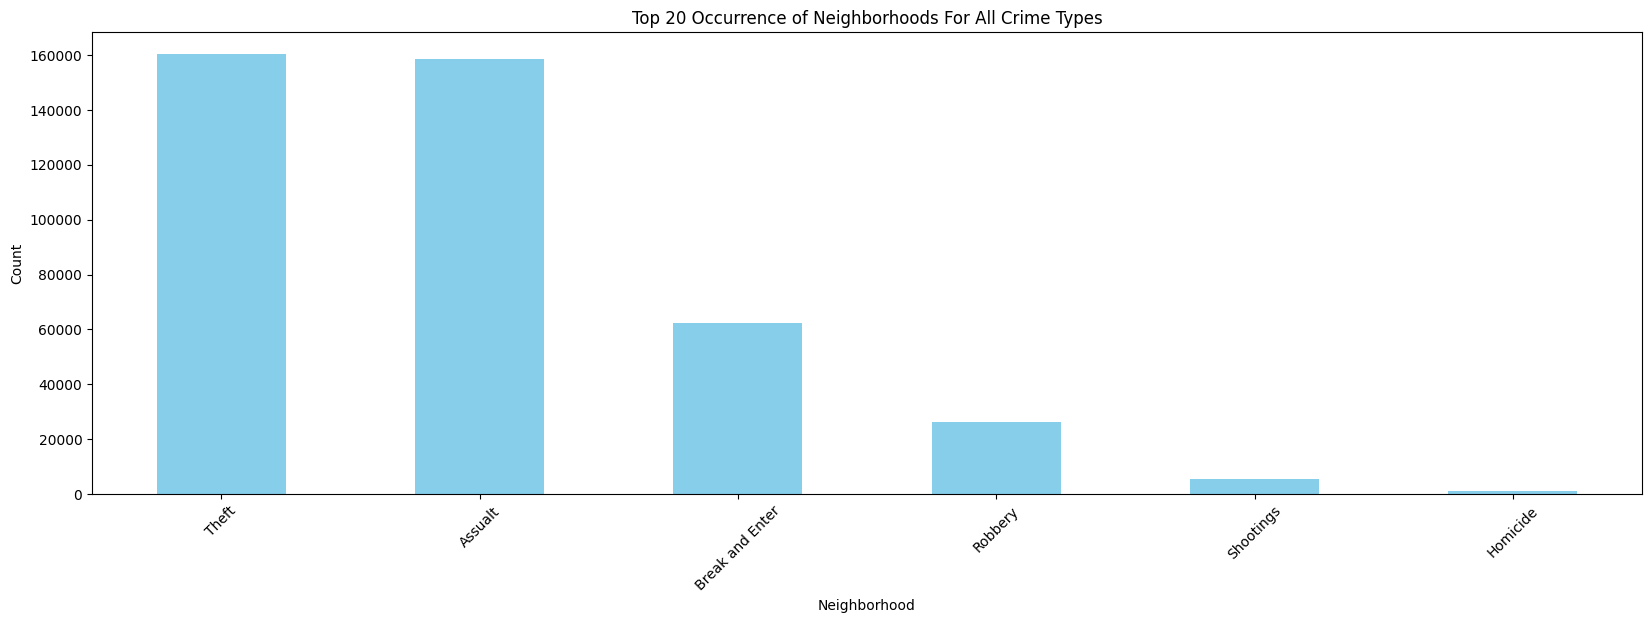

In [75]:
# Count occurrences of each neighborhood
neighborhood_counts = final_df['CRIME_TYPE'].value_counts()

# Plotting the bar graph
neighborhood_counts.nlargest(20).plot(kind='bar', color='skyblue', figsize=(20,6))
plt.title('Top 20 Occurrence of Neighborhoods For All Crime Types')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

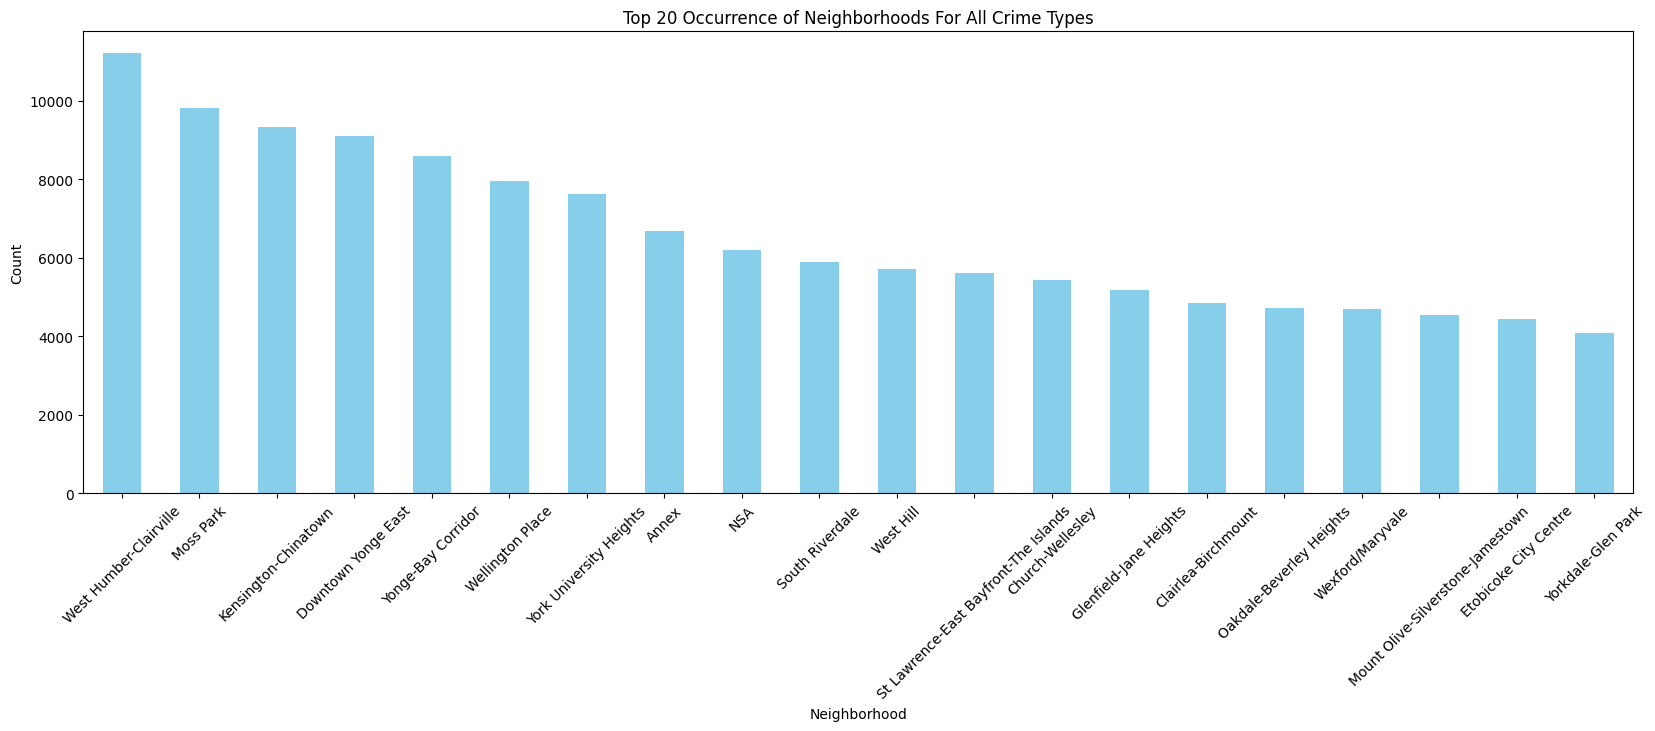

In [76]:
# Count occurrences of each neighborhood
neighborhood_counts = final_df['NEIGHBOURHOOD_158'].value_counts()

# Plotting the bar graph
neighborhood_counts.nlargest(20).plot(kind='bar', color='skyblue', figsize=(20,6))
plt.title('Top 20 Occurrence of Neighborhoods For All Crime Types')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

As we can observe that the neighbourhood of <b>West-Humber-Clairville</b> has the highest occurences meaning that it's the neighbourhood with the highest amount of crime occurences over the period of 2013-2022. Followed by West-Humberville-Clairville neighbourhood, the highest occuring neighbourhoods are <b>Moss Park</b> and <b>Kensington-Chinatown</b>.

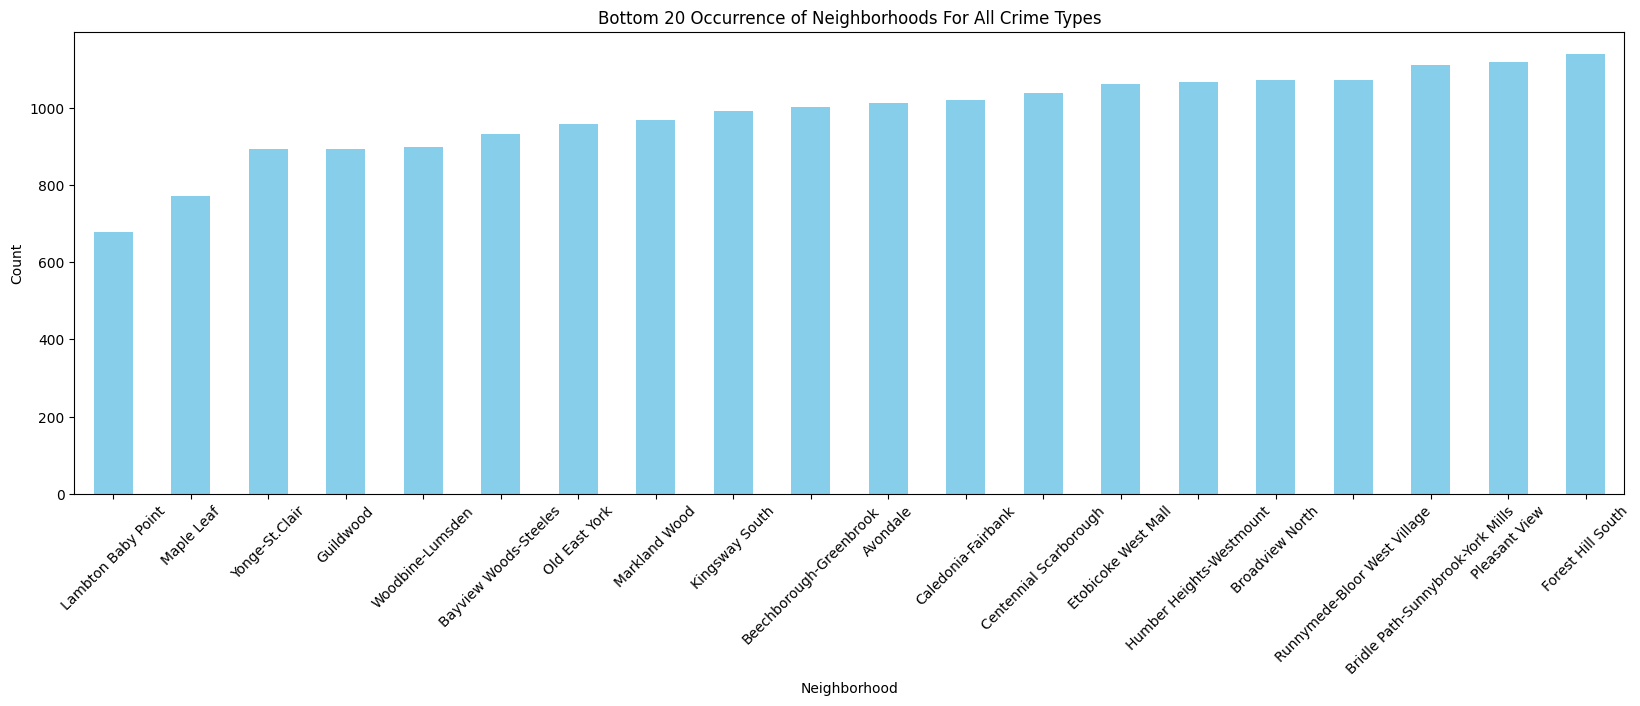

In [77]:
# Count occurrences of each neighborhood
neighborhood_counts = final_df['NEIGHBOURHOOD_158'].value_counts()

# Plotting the bar graph
neighborhood_counts.nsmallest(20).plot(kind='bar', color='skyblue', figsize=(20,6))
plt.title('Bottom 20 Occurrence of Neighborhoods For All Crime Types')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

There are 17 Divisions which contain all the Neighbourhoods!
<ol>
<li><b>D51:</b> South Riverdale, Church-Yonge Corridor, Waterfront Communities-The Island, North St.James Town, Regent Park, Cabbagetown-South St.James Town, Moss Park, St. Lawrence-East Bayfront-The Islands, Downtown Yonge East</li>    
<li><b>D14:</b> South Parkdale, Trinity-Bellwoods, Waterfront Communities-The Island, Kensington-Chinatown, Annex, University, Dovercourt-Wallace Emerson-Junction, Niagara, Palmerston-Little Italy, Dufferin Grove, Little Portugal, Fort York-Liberty Village    </li>
<li><b>D32:</b> York University Heights, Lansing-Westgate, Yorkdale-Glen Park, St.Andrew-Windfields, Westminster-Branson, Clanton Park, Newtonbrook West, Englemount-Lawrence, Bathurst Manor, Oakdale Beverley Heights, Willowdale East, Willowdale West, Bedford Park-Nortown, Bridle Path-Sunnybrook-York Mills, Lawrence Park North, Newtonbrook East </li>
<li><b>D31:</b> York University Heights, Humber Summit, Humbermede, Glenfield-Jane Heights, Oakdale Beverley Heights, Black Creek, Pelmo Park-Humberlea </li>
<li><b>D52:</b> Waterfront Communities-The Island, Kensington-Chinatown, University, Bay Street Corridor</li>
<li><b>D41:</b> Clairlea-Birchmount, Cliffcrest, Ionview, Kennedy Park, Dorset Park, Oakridge, Wexford/Maryvale, Eglinton East, Bendale, Birchcliffe-Cliffside</li>
<li><b>D43:</b> Scarborough Village, Centennial Scarborough, Cliffcrest, Guildwood, West Hill, Highland Creek, Eglinton East, Bendale, Rouge, Woburn, Morningside</li>
<li><b>D55:</b> The Beaches, Danforth East York, Danforth, South Riverdale, Taylor-Massey, Flemingdon Park, Broadview North, North Riverdale, Greenwood-Coxwell, Victoria Village, O'Connor-Parkview, Old East York, Blake-Jones, East End-Danforth, Playter Estates-Danforth, Woodbine-Lumsden, Woodbine Corridor, Leaside-Bennington</li>
<li><b>D22:</b> Stonegate-Queensway, Islington-City Centre West, Princess-Rosethorn, Etobicoke West Mall, Kingsway South, Humber Heights-Westmount, Edenbridge-Humber Valley, Eringate-Centennial-West Deane, Alderwood, New Toronto, Long Branch, Markland Wood, Mimico (includes Humber Bay Shores)</li>
<li><b>D23:</b> Thistletown-Beaumond Heights, Humbermede, West Humber-Clairville, Kingsview Village-The Westway, Humber Heights-Westmount, Edenbridge-Humber Valley, Elms-Old Rexdale, Eringate-Centennial-West Deane, Mount Olive-Silverstone-Jamestown, Rexdale-Kipling, Willowridge-Martingrove-Richview</li>
<li><b>D42:</b> Tam O'Shanter-Sullivan, Centennial Scarborough, Agincourt North, Agincourt South-Malvern West, L'Amoreaux, Rouge, Malvern, Steeles, Milliken</li>
<li><b>D53:</b> Yonge-St.Clair, Thorncliffe Park, Broadview North, Forest Hill North, Casa Loma, Forest Hill South, Annex, Rosedale-Moore Park, Mount Pleasant East, Mount Pleasant West, Bedford Park-Nortown, Bridle Path-Sunnybrook-York Mills, Lawrence Park South, Yonge-Eglinton, Leaside-Bennington</li>
<li><b>D33:</b> St.Andrew-Windfields, Victoria Village, Bayview Woods-Steeles, Henry Farm, Hillcrest Village, Banbury-Don Mills, Parkwoods-Donalda, Bayview Village, Bridle Path-Sunnybrook-York Mills, Don Valley Village, Pleasant View, Leaside-Bennington</li>
<li><b>D11:</b> South Parkdale, Junction Area, Runnymede-Bloor West Village, Roncesvalles, Dovercourt-Wallace Emerson-Junction, High Park North, High Park-Swansea, Weston-Pelham Park, Lambton Baby Point, Rockcliffe-Smythe, Dufferin Grove, Little Portugal</li>
<li><b>D12:</b> Rustic, Junction Area, Keelesdale-Eglinton West, Mount Dennis, Beechborough-Greenbrook, Weston-Pelham Park, Pelmo Park-Humberlea, Rockcliffe-Smythe, Weston, Brookhaven-Amesbury, Maple Leaf   </li>
<li><b>D13:</b> Yorkdale-Glen Park, Humewood-Cedarvale, Corso Italia-Davenport, Forest Hill North, Casa Loma, Forest Hill South, Caledonia-Fairbank, Dovercourt-Wallace Emerson-Junction, Oakwood Village, Englemount-Lawrence, Wychwood, Briar Hill-Belgravia</li>
<br /><br />
<br /><li><b>D54:</b> After research I found out that D54 was merged with D55, so I will be changing all the occurrences of D54 to D55</li>
<li><b>NSA </b>I could not find out what this meant, so I will treat it as a seperate division for now. </li>
</ol>

In [78]:
final_df['DIVISION'].unique()

array(['D32', 'D51', 'D54', 'D52', 'NSA', 'D14', 'D53', 'D43', 'D13',
       'D22', 'D31', 'D33', 'D55', 'D41', 'D12', 'D11', 'D42', 'D23'],
      dtype=object)

In [79]:
final_df['DIVISION']= final_df['DIVISION'].replace("D54","D55")

In [80]:
# Count the occurrence of each division 
division_counts = final_df['DIVISION'].value_counts()
division_counts

DIVISION
D51    37075
D55    34646
D14    32304
D32    31528
D31    28148
D52    27877
D41    27639
D43    27146
D22    26230
D23    26121
D42    23337
D53    21891
D33    17793
D11    16996
D12    16701
D13    15011
NSA     3884
Name: count, dtype: int64

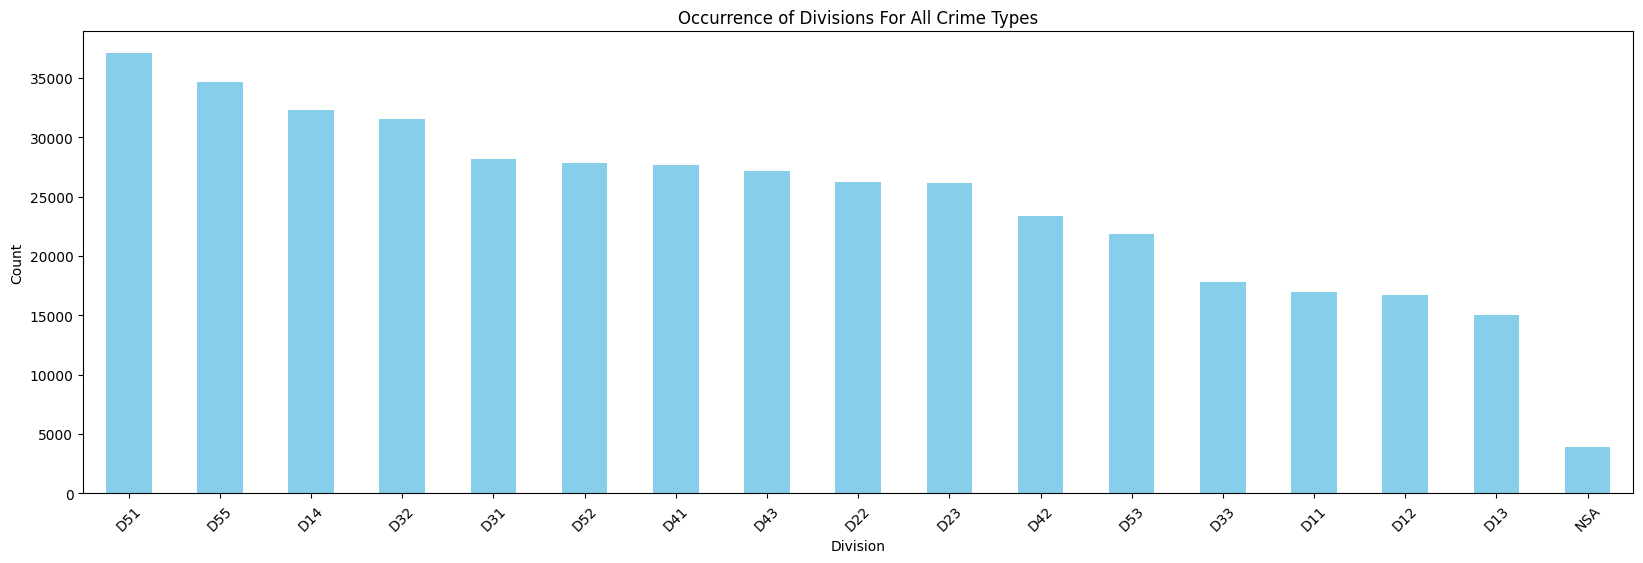

In [81]:
# Plotting the bar graph
division_counts.plot(kind='bar', color='skyblue', figsize=(20,6))
plt.title('Occurrence of Divisions For All Crime Types')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

As we can see we have neighbourhood codes of all the areas, but there is a code NSA which needs more investigation. 

In [82]:
final_df['CRIME_TYPE'].unique()

array(['Assualt', 'Theft', 'Homicide', 'Robbery', 'Shootings',
       'Break and Enter'], dtype=object)

In [83]:
crime_list = ['Assualt', 'Theft', 'Homicide', 'Robbery', 'Shootings',
       'Break and Enter']

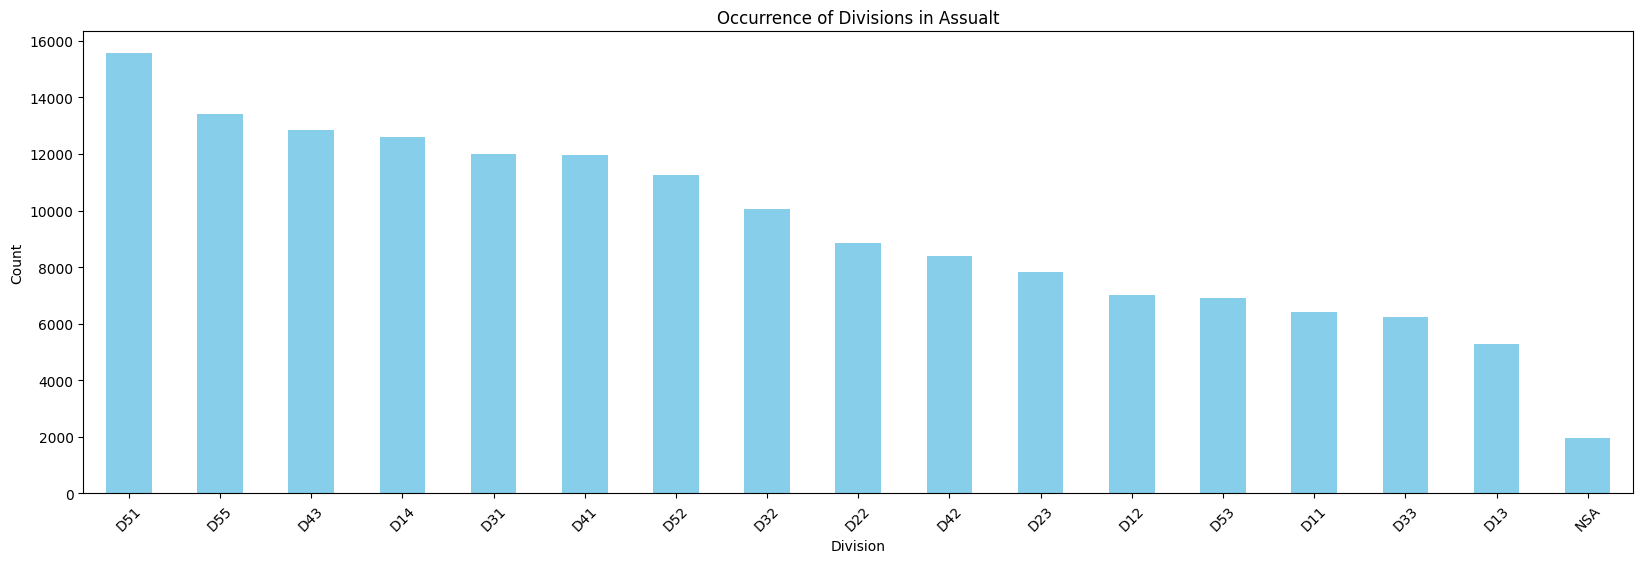

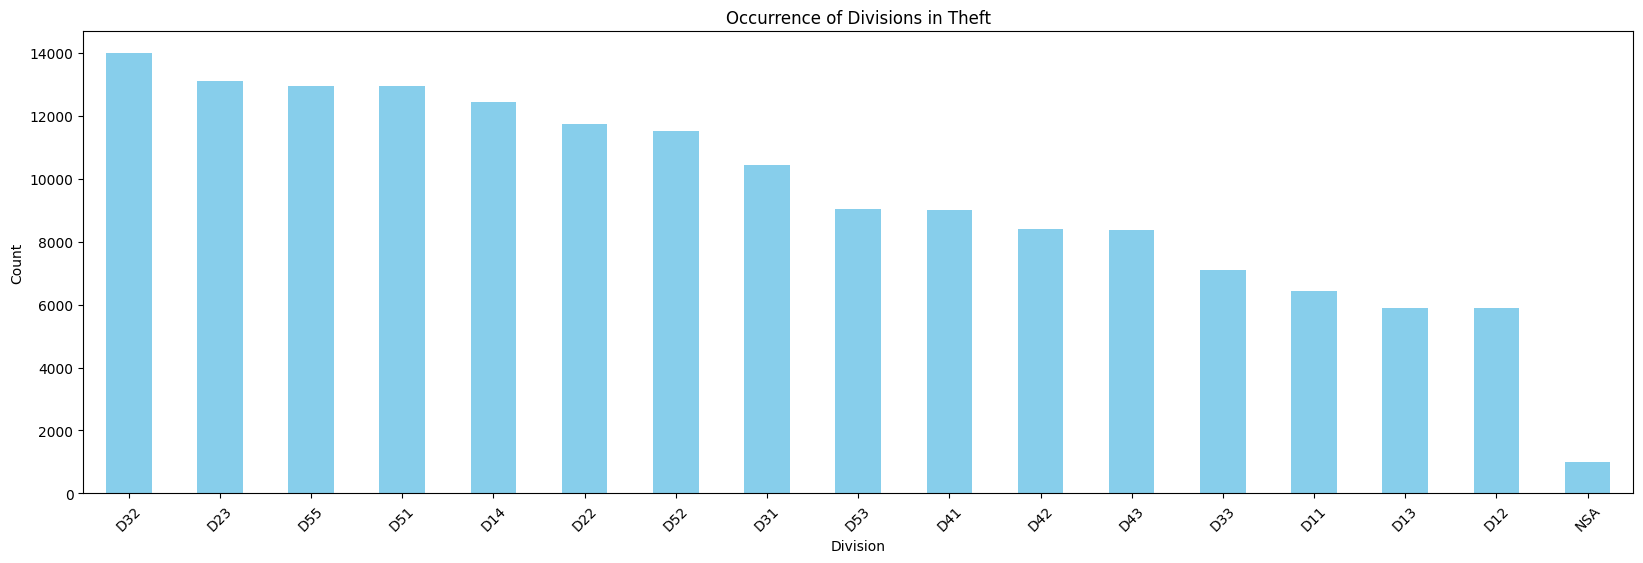

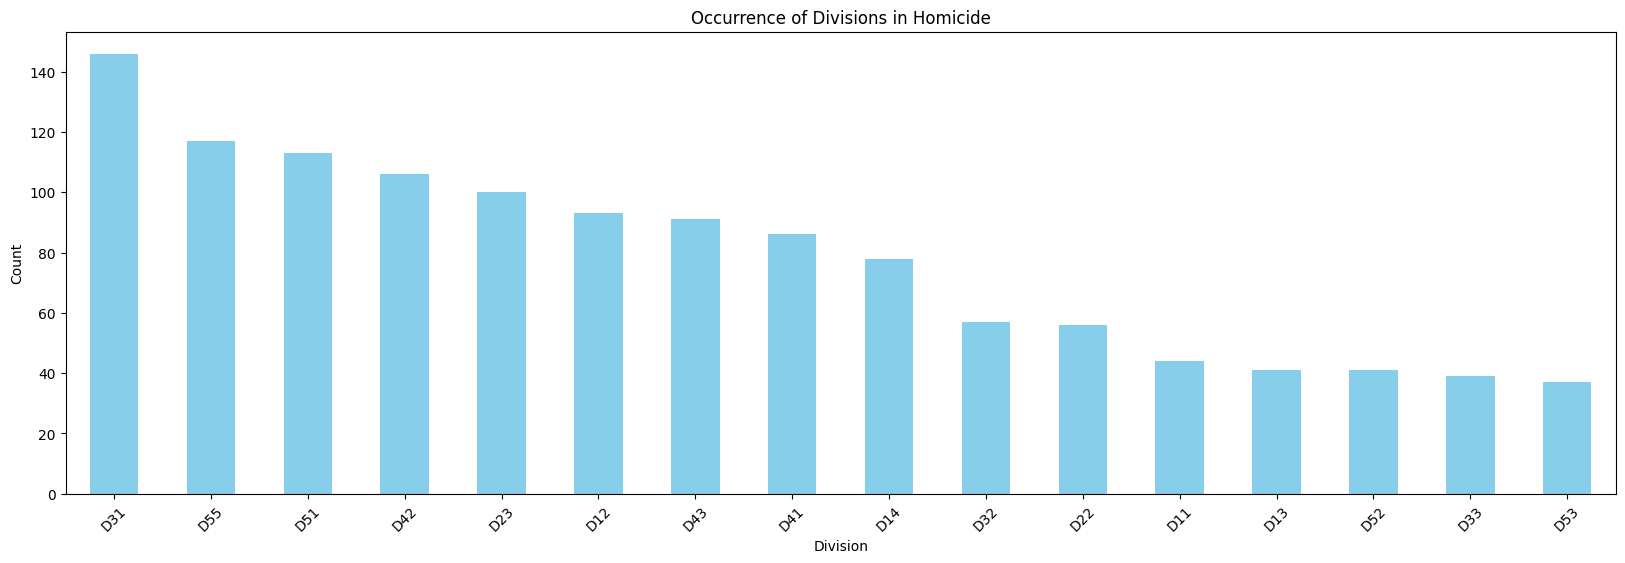

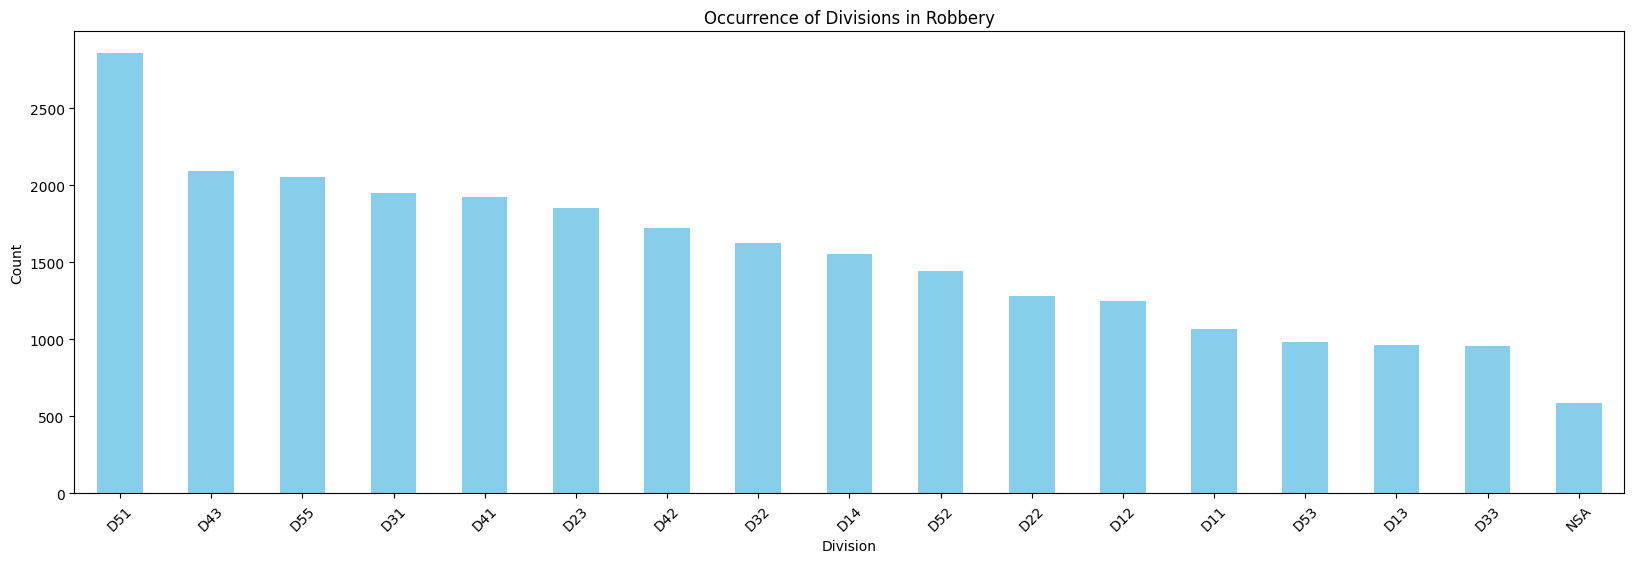

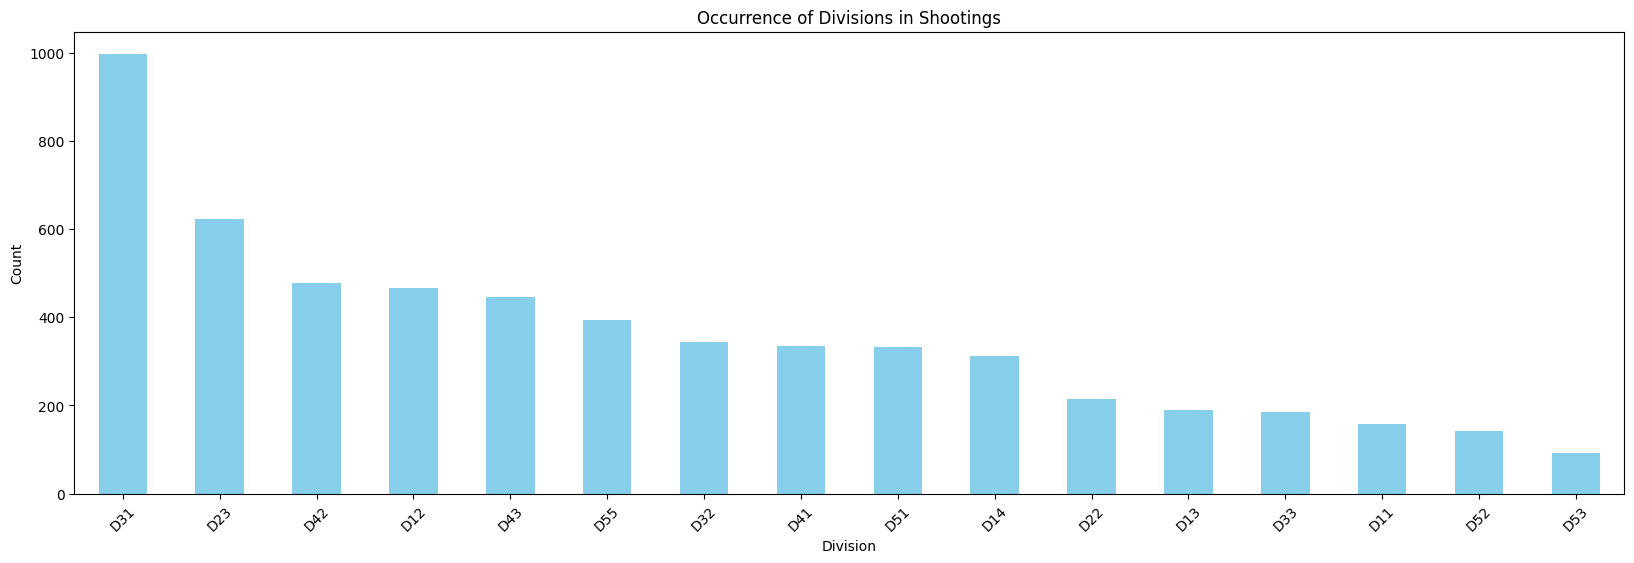

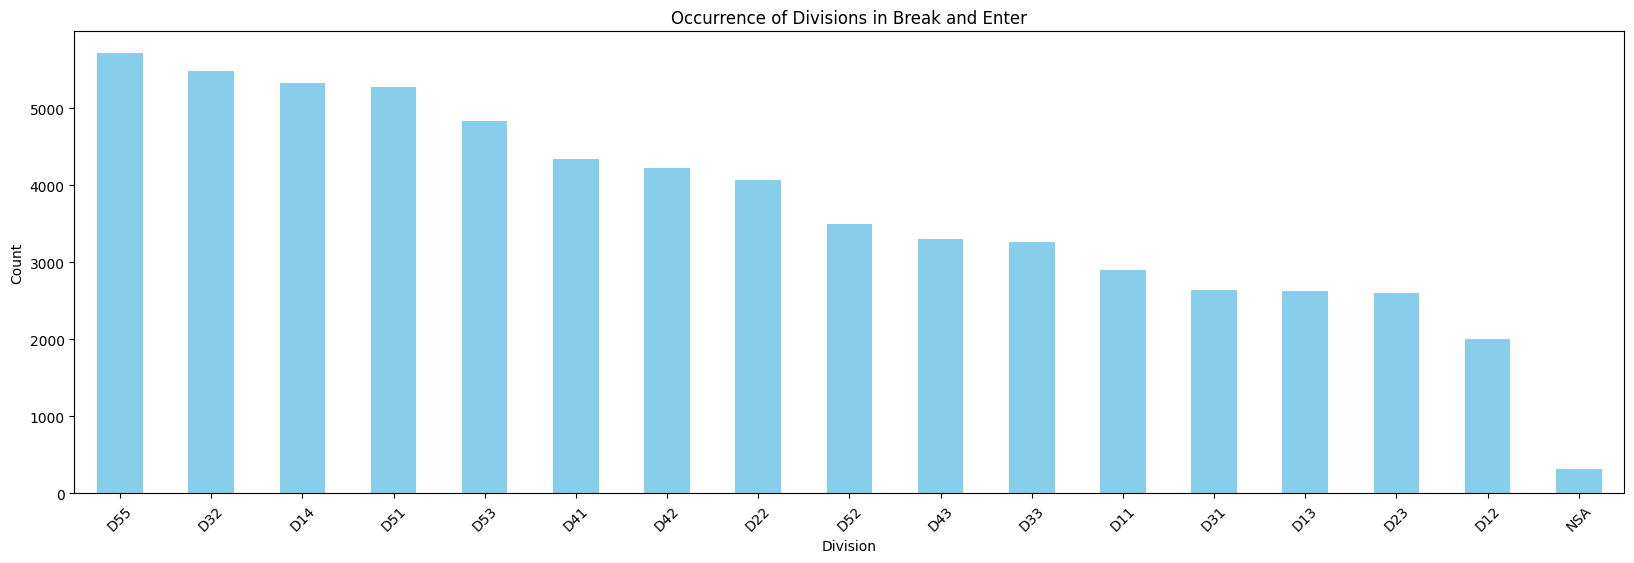

In [84]:
for crime_type in crime_list:
    # Filter final_df by the desired Crime_Type
    filtered_division_counts = final_df['DIVISION'][final_df['CRIME_TYPE'] == crime_type].value_counts()
    # Plotting the bar graph
    filtered_division_counts.plot(kind='bar', color='skyblue', figsize=(20,6))
    plt.title(f'Occurrence of Divisions in {crime_type}')
    plt.xlabel('Division')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()

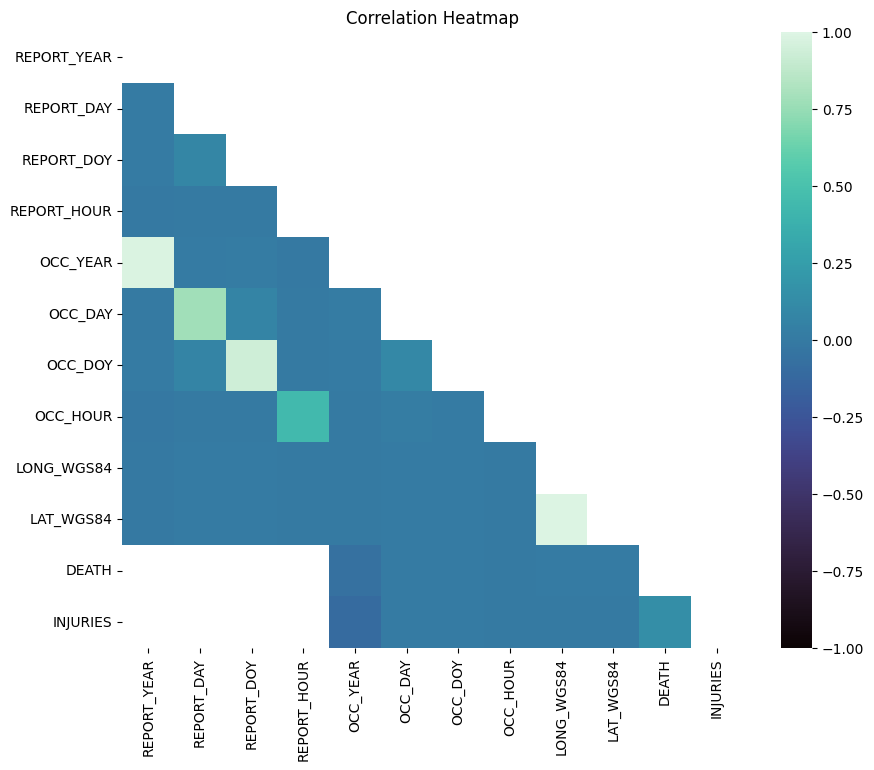

In [85]:
# Calculate the correlation matrix for all columns
correlation_matrix = final_df.corr(numeric_only=True)

# Display the correlation matrix
correlation_matrix

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='mako', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [86]:
final_df[final_df['HOOD_158'] == 'NSA']

,CRIME_TYPE,EVENT_UNIQUE_ID,REPORT_DATE_FIXED,OCC_DATE_FIXED,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,PRIMARY_OFFENCE,STATUS,HOMICIDE_TYPE,DEATH,INJURIES
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Assualt,GO-20141260537,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,NSA,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
129,Assualt,GO-20142552857,2014-01-03,2013-01-03,2014.0,January,3.0,3.0,Friday,11.0,2013.0,January,3.0,3.0,Thursday,15.0,D23,Other Non Commercial / Corporate Places (Non-P...,Other,1420.0,100.0,Assault With Weapon,Assault,NSA,NSA,-79.723361,43.658652,NotApplicable,NotApplicable,NotApplicable,0,0
162,Assualt,GO-20141283403,2014-01-04,2014-01-04,2014.0,January,4.0,4.0,Saturday,23.0,2014.0,January,4.0,4.0,Saturday,23.0,D55,Hospital / Institutions / Medical Facilities (...,Other,1430.0,100.0,Assault,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
196,Assualt,GO-20141285582,2014-01-05,2012-01-01,2014.0,January,5.0,5.0,Sunday,11.0,2012.0,January,1.0,1.0,Sunday,0.0,NSA,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430.0,100.0,Assault,Assault,NSA,NSA,-79.316266,43.824932,NotApplicable,NotApplicable,NotApplicable,0,0
202,Assualt,GO-20141287665,2014-01-05,2014-01-05,2014.0,January,5.0,5.0,Sunday,18.0,2014.0,January,5.0,5.0,Sunday,18.0,NSA,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61807,Break and Enter,GO-20222272856,2022-11-22,2022-11-21,2022.0,November,22.0,326.0,Tuesday,15.0,2022.0,November,21.0,325.0,Monday,8.0,NSA,"Apartment (Rooming House, Condo)",Apartment,2120.0,200.0,B&E,Break and Enter,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
61841,Break and Enter,GO-20222290886,2022-11-24,2022-11-16,2022.0,November,24.0,328.0,Thursday,11.0,2022.0,November,16.0,320.0,Wednesday,17.0,NSA,"Construction Site (Warehouse, Trailer, Shed)",Commercial,2120.0,200.0,B&E,Break and Enter,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0
61875,Break and Enter,GO-20222299326,2022-11-25,2022-11-24,2022.0,November,25.0,329.0,Friday,13.0,2022.0,November,24.0,328.0,Thursday,8.0,NSA,"Apartment (Rooming House, Condo)",Apartment,2120.0,200.0,B&E,Break and Enter,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0


There are 6190 rows with NSA Neighbourhood code.

Now creating dummy variables so that I can do some basic modelling!

In [87]:
#Perform one-hot encoding
dummies = pd.get_dummies(final_df['DIVISION'])

# Concatenate the one-hot encoded columns to the original dataframe
final_df = pd.concat([final_df, dummies], axis=1)

In [88]:
final_df = final_df.drop('DIVISION', axis=1)

final_df.head(10)

,CRIME_TYPE,EVENT_UNIQUE_ID,REPORT_DATE_FIXED,OCC_DATE_FIXED,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,PRIMARY_OFFENCE,STATUS,HOMICIDE_TYPE,DEATH,INJURIES,D11,D12,D13,D14,D22,D23,D31,D32,D33,D41,D42,D43,D51,D52,D53,D55,NSA
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Assualt,GO-20141262074,2014-01-01,1998-06-01,2014.0,January,1.0,1.0,Wednesday,12.0,NaN,NaN,NaN,NaN,NaN,12.0,"Apartment (Rooming House, Condo)",Apartment,1480.0,110.0,Administering Noxious Thing,Assault,38,Lansing-Westgate,-79.425896,43.757346,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Assualt,GO-20141260889,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,"Apartment (Rooming House, Condo)",Apartment,1430.0,100.0,Assault,Assault,74,North St.James Town,-79.376497,43.666423,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,Assualt,GO-20141261050,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,69,Blake-Jones,-79.344839,43.678946,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,Assualt,GO-20141259344,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,2.0,2014.0,January,1.0,1.0,Wednesday,2.0,Bar / Restaurant,Commercial,1420.0,110.0,Assault Bodily Harm,Assault,164,Wellington Place,-79.391841,43.646639,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,Assualt,GO-20141260537,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,4.0,2014.0,January,1.0,1.0,Wednesday,4.0,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430.0,100.0,Assault,Assault,NSA,NSA,-85.488744,0.000000,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,Assualt,GO-20141260618,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,5.0,2014.0,January,1.0,1.0,Wednesday,2.0,Bar / Restaurant,Commercial,1430.0,100.0,Assault,Assault,81,Trinity-Bellwoods,-79.416594,43.654753,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7,Assualt,GO-20141260056,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,1.0,2014.0,January,1.0,1.0,Wednesday,1.0,Bar / Restaurant,Commercial,1430.0,100.0,Assault,Assault,95,Annex,-79.391279,43.671127,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8,Assualt,GO-20141259834,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,0.0,2014.0,January,1.0,1.0,Wednesday,0.0,Bar / Restaurant,Commercial,1420.0,100.0,Assault With Weapon,Assault,55,Thorncliffe Park,-79.345795,43.703684,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9,Assualt,GO-20141260264,2014-01-01,2014-01-01,2014.0,January,1.0,1.0,Wednesday,1.0,2014.0,January,1.0,1.0,Wednesday,1.0,Go Train,Transit,1430.0,100.0,Assault,Assault,143,West Rouge,-79.132919,43.780412,NotApplicable,NotApplicable,NotApplicable,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [89]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414327 entries, 1 to 62527
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CRIME_TYPE         414327 non-null  object 
 1   EVENT_UNIQUE_ID    414327 non-null  object 
 2   REPORT_DATE_FIXED  414327 non-null  object 
 3   OCC_DATE_FIXED     414327 non-null  object 
 4   REPORT_YEAR        407375 non-null  float64
 5   REPORT_MONTH       407375 non-null  object 
 6   REPORT_DAY         407375 non-null  float64
 7   REPORT_DOY         407375 non-null  float64
 8   REPORT_DOW         407375 non-null  object 
 9   REPORT_HOUR        407375 non-null  float64
 10  OCC_YEAR           414212 non-null  float64
 11  OCC_MONTH          414212 non-null  object 
 12  OCC_DAY            414212 non-null  float64
 13  OCC_DOY            414212 non-null  float64
 14  OCC_DOW            414212 non-null  object 
 15  OCC_HOUR           413082 non-null  float64
 16  LOCATION

Now checking the unique values for other columns to find out whether we can create dummy variables or not

In [90]:
final_df['STATUS'].value_counts()

STATUS
NotApplicable    385780
STOLEN            27767
UNKNOWN             476
RECOVERED           304
Name: count, dtype: int64

Dropping the `STATUS` column as it is specific to Bike Theft which is not the focus of my analysis as it comes under the broader category of Theft in general.

In [91]:
final_df = final_df.drop('STATUS', axis=1)

In [92]:
final_df['HOMICIDE_TYPE'].value_counts()

HOMICIDE_TYPE
NotApplicable    413082
Shooting            659
Other               313
Stabbing            273
Name: count, dtype: int64

Dropping the `HOMICIDE_TYPE` column as it is specific to Homicide crime type which is not the focus of my analysis as it comes under the broader category of Homicide in general.

In [93]:
final_df = final_df.drop('HOMICIDE_TYPE', axis=1)

In [94]:
final_df['OFFENCE'].value_counts()

OFFENCE
Assault                           110389
Theft From Motor Vehicle Under     78998
B&E                                52691
Theft Of Motor Vehicle             42001
NotApplicable                      35499
Assault With Weapon                25903
B&E W'Intent                        7670
Robbery - Mugging                   7576
Assault Bodily Harm                 7021
Theft Over                          5976
Robbery - Other                     4563
Assault Peace Officer               4341
Robbery With Weapon                 4213
Robbery - Business                  3858
Assault - Resist/ Prevent Seiz      2666
Theft From Motor Vehicle Over       2623
Aggravated Assault                  2348
Unlawfully In Dwelling-House        1931
Robbery - Swarming                  1907
Discharge Firearm With Intent       1696
Discharge Firearm - Recklessly      1368
Theft From Mail / Bag / Key         1304
Pointing A Firearm                  1070
Robbery - Purse Snatch              1000
Robbery 

In [95]:
final_df['PRIMARY_OFFENCE'].value_counts()

PRIMARY_OFFENCE
NotApplicable                     385780
THEFT UNDER                        13833
THEFT UNDER - BICYCLE              10626
B&E                                 1646
THEFT OF EBIKE UNDER $5000           847
                                   ...  
AGGRAVATED ASLT PEACE OFFICER          1
MISCHIEF - ENDANGER LIFE               1
INTIMATE PARTNER INCIDENT              1
INCIDENT - BICYCLE                     1
FIREARM - UNAUTHORIZED POSSESS         1
Name: count, Length: 77, dtype: int64

I will be dropping `OFFENCE` and `PRIMARY_OFFENCE` columns as well since they are just redundant as I have already categorized all the rows with broader terms, rather than breaking them down to this specificity.

In [96]:
final_df = final_df.drop(['OFFENCE','PRIMARY_OFFENCE'], axis=1)


In [97]:
#Sanity Check!
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414327 entries, 1 to 62527
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CRIME_TYPE         414327 non-null  object 
 1   EVENT_UNIQUE_ID    414327 non-null  object 
 2   REPORT_DATE_FIXED  414327 non-null  object 
 3   OCC_DATE_FIXED     414327 non-null  object 
 4   REPORT_YEAR        407375 non-null  float64
 5   REPORT_MONTH       407375 non-null  object 
 6   REPORT_DAY         407375 non-null  float64
 7   REPORT_DOY         407375 non-null  float64
 8   REPORT_DOW         407375 non-null  object 
 9   REPORT_HOUR        407375 non-null  float64
 10  OCC_YEAR           414212 non-null  float64
 11  OCC_MONTH          414212 non-null  object 
 12  OCC_DAY            414212 non-null  float64
 13  OCC_DOY            414212 non-null  float64
 14  OCC_DOW            414212 non-null  object 
 15  OCC_HOUR           413082 non-null  float64
 16  LOCATION

In [98]:
final_df['UCR_CODE'].value_counts()

UCR_CODE
1430.0           110744
2142.0            78998
2120.0            62398
2135.0            42001
NotApplicable     35499
1420.0            32924
1610.0            26169
2130.0             7590
1460.0             4449
1480.0             3106
1450.0             3088
2132.0             2623
1410.0             2365
1457.0             1070
2133.0              525
1461.0              455
1455.0              169
1470.0               92
1462.0               19
1440.0               14
2125.0               13
2121.0               12
1611.0                2
1475.0                2
Name: count, dtype: int64

I will be replacing the 'Not Applicable' value with 0.0 as it will enable me to use the column for analysis.

In [99]:
final_df['UCR_CODE']= final_df['UCR_CODE'].replace("NotApplicable",0.0)

In [100]:
final_df['UCR_EXT'].value_counts()

UCR_EXT
100.0            153050
200.0            143742
210.0             53766
NotApplicable     35499
220.0             12270
110.0              8803
180.0              1907
120.0              1740
150.0              1002
140.0               802
130.0               740
170.0               279
160.0               247
215.0               145
211.0               122
230.0               112
190.0               101
Name: count, dtype: int64

I will be replacing the 'Not Applicable' value with 0.0 as it will enable me to use the column for analysis.

In [101]:
final_df['UCR_EXT']= final_df['UCR_EXT'].replace("NotApplicable",0.0)

In [102]:
# Checking the data types and sanity check
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414327 entries, 1 to 62527
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CRIME_TYPE         414327 non-null  object 
 1   EVENT_UNIQUE_ID    414327 non-null  object 
 2   REPORT_DATE_FIXED  414327 non-null  object 
 3   OCC_DATE_FIXED     414327 non-null  object 
 4   REPORT_YEAR        407375 non-null  float64
 5   REPORT_MONTH       407375 non-null  object 
 6   REPORT_DAY         407375 non-null  float64
 7   REPORT_DOY         407375 non-null  float64
 8   REPORT_DOW         407375 non-null  object 
 9   REPORT_HOUR        407375 non-null  float64
 10  OCC_YEAR           414212 non-null  float64
 11  OCC_MONTH          414212 non-null  object 
 12  OCC_DAY            414212 non-null  float64
 13  OCC_DOY            414212 non-null  float64
 14  OCC_DOW            414212 non-null  object 
 15  OCC_HOUR           413082 non-null  float64
 16  LOCATION

Changing `UCR_CODE` and `UCR_EXT` data type to int64. 

In [103]:
# List of columns to convert to numeric
columns_to_convert = ['UCR_CODE', 'UCR_EXT']

# Convert specified columns to numeric
final_df[columns_to_convert] = final_df[columns_to_convert].apply(pd.to_numeric)

In [104]:
non_numeric_columns = final_df.select_dtypes(exclude=['number'])

print("Columns with non-numeric (object) data type:")
non_numeric_columns.info()

Columns with non-numeric (object) data type:
<class 'pandas.core.frame.DataFrame'>
Index: 414327 entries, 1 to 62527
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CRIME_TYPE         414327 non-null  object
 1   EVENT_UNIQUE_ID    414327 non-null  object
 2   REPORT_DATE_FIXED  414327 non-null  object
 3   OCC_DATE_FIXED     414327 non-null  object
 4   REPORT_MONTH       407375 non-null  object
 5   REPORT_DOW         407375 non-null  object
 6   OCC_MONTH          414212 non-null  object
 7   OCC_DOW            414212 non-null  object
 8   LOCATION_TYPE      414327 non-null  object
 9   PREMISES_TYPE      414327 non-null  object
 10  MCI_CATEGORY       414327 non-null  object
 11  HOOD_158           414327 non-null  object
 12  NEIGHBOURHOOD_158  414327 non-null  object
 13  D11                414327 non-null  bool  
 14  D12                414327 non-null  bool  
 15  D13                414327 non

In [105]:
# Checking whether it is possible to binarise LOCATION_TYPE and PREMISES_TYPE
final_df['LOCATION_TYPE'].value_counts()

LOCATION_TYPE
Apartment (Rooming House, Condo)                                          85408
Single Home, House (Attach Garage, Cottage, Mobile)                       78617
Streets, Roads, Highways (Bicycle Path, Private Road)                     64914
Parking Lots (Apt., Commercial Or Non-Commercial)                         58819
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    39229
Bar / Restaurant                                                          12566
Private Property Structure (Pool, Shed, Detached Garage)                   9794
NotApplicable                                                              6952
Open Areas (Lakes, Parks, Rivers)                                          6513
Schools During Supervised Activity                                         4686
Convenience Stores                                                         4015
Ttc Subway Station                                                         4010
Commercial Dwelling Unit (

Cannot create dummy variables as their are too many unique values. So I will be dropping it!

In [106]:
final_df = final_df.drop(['LOCATION_TYPE'], axis=1)

In [107]:
final_df['PREMISES_TYPE'].value_counts()

PREMISES_TYPE
Outside          131106
Apartment         85408
House             78617
Commercial        67312
Other             26402
Transit            9403
Educational        9127
NotApplicable      6952
Name: count, dtype: int64

I believe it is possible to create dummy variable for `PREMISES_TYPE`!

In [108]:
#Perform one-hot encoding
dummies = pd.get_dummies(final_df['PREMISES_TYPE'])

# Concatenate the one-hot encoded columns to the original dataframe
final_df = pd.concat([final_df, dummies], axis=1)

In [109]:
# Dropping as it has been binarised
final_df = final_df.drop(['PREMISES_TYPE'], axis=1)

In [110]:
final_df['MCI_CATEGORY'].value_counts()

MCI_CATEGORY
Assault            158497
NonMCI             114497
Break and Enter     62423
Auto Theft          42001
Robbery             26171
Theft Over          10738
Name: count, dtype: int64

I believe it is possible to create dummy variable for `MCI_CATEGORY`! But we will be dropping it as it higly related to the target variable!

In [112]:
# Dropping as it is highly related to the araget variable!
final_df = final_df.drop(['MCI_CATEGORY'], axis=1)

There are some `NULL` values left in the `OCC_MONTH`, `OCC_YEAR`, `OCC_DAY`,`REPORT_MONTH`, `REPORT_YEAR` and `REPORT_DAY`, which I will be filling usinng the `OCC_DATE_FIXED` and `REPORT_DATE_FIXED` columns by slicing them.

In [113]:
# Extract day, year, and month information from 'OCC_DATE_FIXED'
final_df['OCC_DAY'] = final_df['OCC_DATE_FIXED'].str.split('-').str.get(2)  # Extracts day
final_df['OCC_YEAR'] = final_df['OCC_DATE_FIXED'].str.split('-').str.get(0)  # Extracts year
final_df['OCC_MONTH'] = final_df['OCC_DATE_FIXED'].str.split('-').str.get(1)  # Extracts month

# Extract day, year, and month information from 'REPORT_DATE_FIXED'
final_df['REPORT_DAY'] = final_df['REPORT_DATE_FIXED'].str.split('-').str.get(2)  # Extracts day
final_df['REPORT_YEAR'] = final_df['REPORT_DATE_FIXED'].str.split('-').str.get(0)  # Extracts year
final_df['REPORT_MONTH'] = final_df['REPORT_DATE_FIXED'].str.split('-').str.get(1)  # Extracts month

I will be dropping `EVENT_UNIQUE_ID` as it does not provide any valuable insight as it is just an identifier column. <br />  
The `REPORT_DATE_FIXED`, `OCC_DATE_FIXED `, `REPORT_MONTH`, `REPORT_DOW`, `OCC_MONTH`, `OCC_DOW`, `HOOD_158` and `NEIGHBOURHOOD_158` will be dropped as they are already represented in numeric manner, so it'll just be redundant to keep them!   

In [114]:
final_df = final_df.drop(['REPORT_DATE_FIXED',
                           'OCC_DATE_FIXED', 'REPORT_DOW', 'REPORT_DOY','OCC_DOY', 'OCC_HOUR','REPORT_HOUR',
                            'OCC_DOW', 'HOOD_158', 'NEIGHBOURHOOD_158', 'EVENT_UNIQUE_ID'], axis=1)

Checking whether any more `object` columns are present!

In [115]:
non_numeric_columns = final_df.select_dtypes(exclude=['number'])

print("Columns with non-numeric (object) data type:")
non_numeric_columns.info()

Columns with non-numeric (object) data type:
<class 'pandas.core.frame.DataFrame'>
Index: 414327 entries, 1 to 62527
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CRIME_TYPE     414327 non-null  object
 1   REPORT_YEAR    414327 non-null  object
 2   REPORT_MONTH   414327 non-null  object
 3   REPORT_DAY     414327 non-null  object
 4   OCC_YEAR       414327 non-null  object
 5   OCC_MONTH      414327 non-null  object
 6   OCC_DAY        414327 non-null  object
 7   D11            414327 non-null  bool  
 8   D12            414327 non-null  bool  
 9   D13            414327 non-null  bool  
 10  D14            414327 non-null  bool  
 11  D22            414327 non-null  bool  
 12  D23            414327 non-null  bool  
 13  D31            414327 non-null  bool  
 14  D32            414327 non-null  bool  
 15  D33            414327 non-null  bool  
 16  D41            414327 non-null  bool  
 17  D42      

In [118]:
list_of_columns = ['Apartment','D11','D12','D13','D14',
         'D22','D23','D31','D32','D33','D41',
         'D42','D43','D51','D52','D53','D55',
         'NSA','Commercial','Educational','House',
         'NotApplicable','Other','Outside','Transit'
         ]
final_df[list_of_columns] = final_df[list_of_columns].astype(int)

In [ ]:
#Sanity Check
final_df.info()

Before fitting a model I need to encode my target variable i.e., `CRIME_TYPE`!

In [119]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the data and transform the categorical labels to numerical labels
final_df['CRIME_TYPE'] = label_encoder.fit_transform(final_df['CRIME_TYPE'])


I can finally try fitting it into a model! The first model I will be trying is a simple Logistic Regression model without much preprocessing!

In [120]:
# Split the DataFrame into features (X) and the target variable (y)
X = final_df.drop(columns=['CRIME_TYPE'])  # Features
y = final_df['CRIME_TYPE']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create and fit the logistic regression model
logreg_model = LogisticRegression(max_iter=7000, n_jobs=4)
logreg_model.fit(X_train, y_train)

# Now the model is trained, and you can use it for prediction or evaluation
# Training and test score
print(f"Train score: {logreg_model.score(X_train, y_train)}")
print(f"Test score: {logreg_model.score(X_test, y_test)}")

Train score: 0.8606653573120217
Test score: 0.858627181232351


<ul>
<li><b>Model Performance:</b>

The training score <b>(0.861)</b> is slightly higher than the testing score <b>(0.859)</b>. This indicates that the model is performing relatively well on unseen data (testing set) and is not significantly overfitting the training data.
The testing score being close to the training score suggests that the model generalizes reasonably well to new, unseen data.</li>
<li><b>Generalization:</b>

The small difference between the training and testing scores implies that the model is not suffering heavily from overfitting or underfitting. It's able to generalize its predictions on new, unseen data, maintaining a similar level of accuracy compared to the training data.</li>

</ul>


Creating another copy of the `final_df` to make it easier for future notebooks!

In [ ]:
final_df.to_csv('../Data/FinalDataAdvAn.csv')

Checking for collinearity !

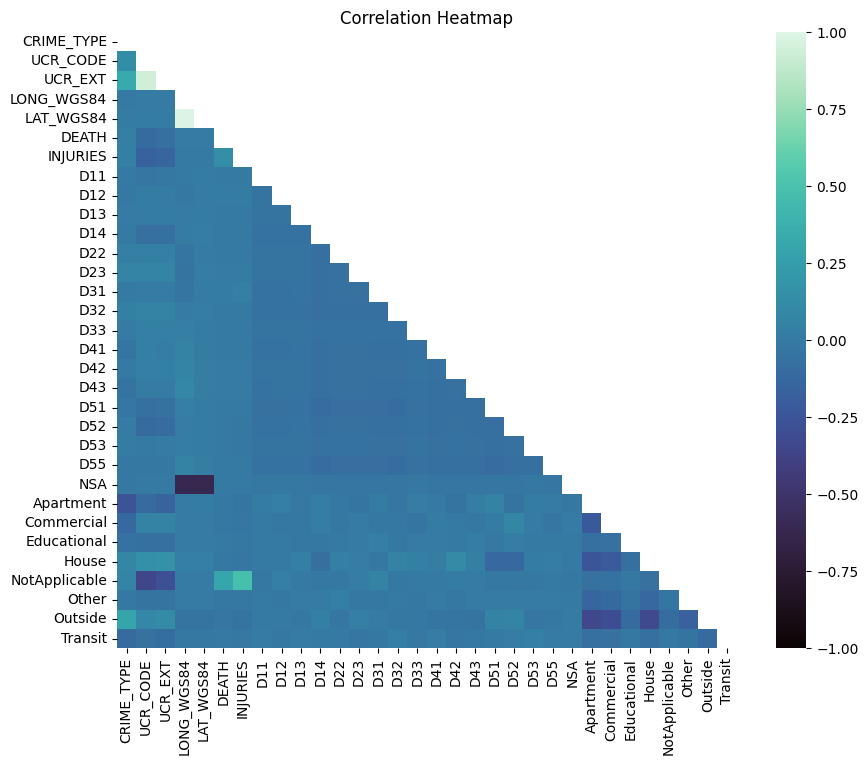

In [126]:
# Calculate the correlation matrix for all columns
correlation_matrix = final_df.corr(numeric_only=True)

# Display the correlation matrix
correlation_matrix

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='mako', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The graph is not indicating any high collinearity between the target variable and the predictor variables. So, we will be looking at the real values of the correlation between them.

In [127]:
correlation_matrix.CRIME_TYPE

CRIME_TYPE       1.000000
UCR_CODE         0.128256
UCR_EXT          0.328117
LONG_WGS84      -0.001514
LAT_WGS84        0.010133
DEATH            0.028435
INJURIES         0.045715
D11             -0.003981
D12             -0.009526
D13              0.004576
D14             -0.007567
D22              0.027754
D23              0.067339
D31             -0.003555
D32              0.032522
D33              0.004990
D41             -0.033506
D42             -0.004556
D43             -0.042740
D51             -0.024016
D52              0.004045
D53              0.011010
D55             -0.009446
NSA             -0.021254
Apartment       -0.261668
Commercial      -0.121357
Educational     -0.062361
House            0.082882
NotApplicable    0.075064
Other           -0.009431
Outside          0.290825
Transit         -0.102889
Name: CRIME_TYPE, dtype: float64

As we can see from the above list, there is no significant collinearity between the target and predictor variables. So we can safely say there is no high collinearity.

In [133]:
# Split the DataFrame into features (X) and the target variable (y)
X = final_df.drop(columns=['CRIME_TYPE'])  # Features
y = final_df['CRIME_TYPE']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
# scale Data
my_scaler=StandardScaler()

X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.transform(X_test)

# pca
my_PCA=PCA(n_components=0.9)
my_PCA.fit(X_train_scaled)

X_train_pca=my_PCA.transform(X_train_scaled)
X_test_pca=my_PCA.transform(X_test_scaled)

# Fitting a model
logreg_scaled = LogisticRegression(C = 0.1, max_iter=10000)
logreg_scaled.fit(X_train_pca, y_train)

# Training and test score
print(f"Train score: {logreg_scaled.score(X_train_pca, y_train)}")
print(f"Test score: {logreg_scaled.score(X_test_pca, y_test)}")

Train score: 0.6591544706617068
Test score: 0.6581227523954336
